#Feature Selection- Filter Method:Chi Square Test
https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/05-Filter-Statistical-Tests/05.2-Chi-square-test.ipynb

# Import Packages



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to obtain the mutual information values
from scipy.stats import chi2_contingency
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
variables = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [ ]:
dataset=pd.read_csv("/content/titanic.csv",usecols=variables)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Embarked  889 non-null    object
dtypes: int64(4), object(2)
memory usage: 41.9+ KB


In [ ]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Survived", axis=1),
    dataset['Survived'],
    test_size=0.3,
    random_state=0,
)

# Create Cross  Table for each feature against Target  Variable.
# Calculate P value using chi2_contingency.

In [ ]:
chi_ls = []

for feature in X_train.columns:
   c = pd.crosstab(y_train, X_train[feature])
      # stat, p, dof, expected = stats.chi2_contingency(crosstab_table)

   p_value =chi2_contingency(c)[1]
   chi_ls.append(p_value)


Text(0.5, 1.0, 'Feature importance based on chi-square test')

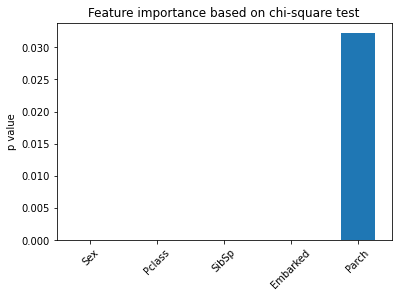

In [ ]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [ ]:
# select top 3

selected = pd.Series(chi_ls, index=X_train.columns).sort_values(
    ascending=True)[0:3].index

selected

Index(['Sex', 'Pclass', 'SibSp'], dtype='object')

In [ ]:
X_train = X_train[selected]
X_test = X_test[selected]